<a href="https://colab.research.google.com/github/Phaeld/udemy-projects/blob/main/exercicio_logica_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Lógica Fuzzy
---
Olá,

Conforme comentado na aula teórica, é possível configurar outros tipos de funções de membership. O objetivo desta tarefa é testar outras funções e comparar os resultados com o código que implementamos anteriormente. Tente executar as modificações abaixo e use outros valores de parâmetros para fazer os testes (consulte a documentação do skfuzzy para entender melhor o que é cada valor)

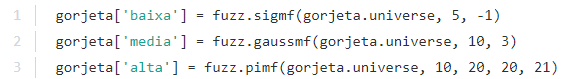

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.4 MB/s eta 0:00:00


In [ ]:
# Importando bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Demostração de crianão de um array
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Criando array para cada variável e classificando de antecedentes
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [ ]:
# Imprime o tipo da variável
qualidade

Antecedent: qualidade

In [ ]:
# Imprime o array
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Cria array e classificando como consequente
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [ ]:
# Imprime o array
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
# Criando os membership
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótima'])

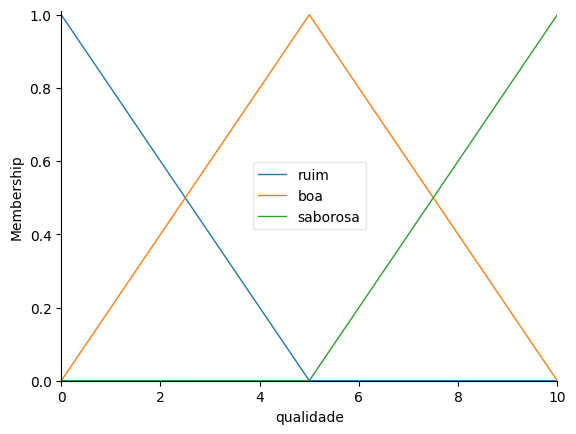

In [ ]:
# Visualiza qualidade
qualidade.view()

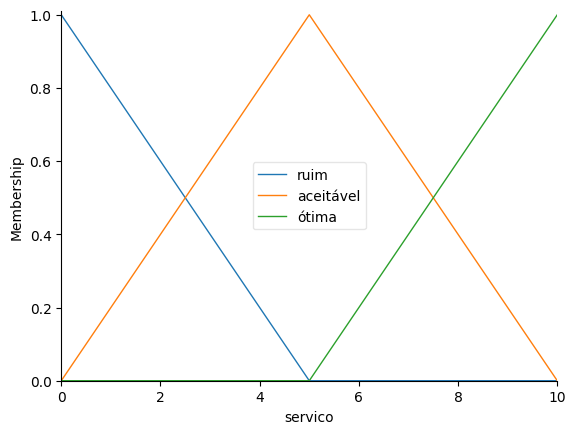

In [ ]:
# Visualiza serviço
servico.view()

In [ ]:
# Cria parâmetros para variável gorjeta
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)

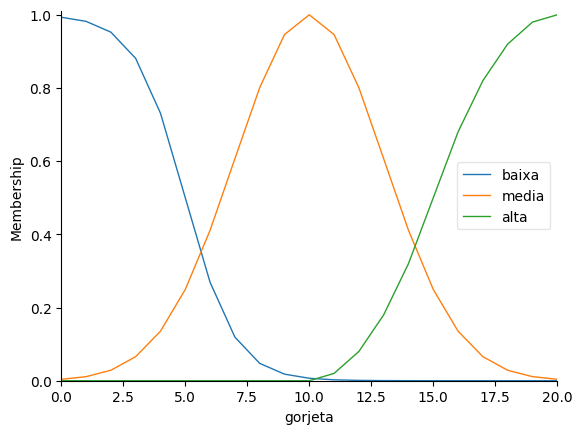

In [ ]:
# Visualiza gorjeta
gorjeta.view()

In [ ]:
# Cria regras para avialiação
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'] | qualidade['boa'], gorjeta['media'])
regra3 = ctrl.Rule(qualidade['saborosa'] | servico['ótima'], gorjeta['alta'])

In [ ]:
# Cria variavel sistema e atribui a regras para fazer controle
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
# Cria variável e atribui variável anterior para fazer simulação
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
# Entre com valores de avaliação
sistema.input['qualidade'] = 8
sistema.input['servico'] = 6
sistema.compute()

12.118564828274796


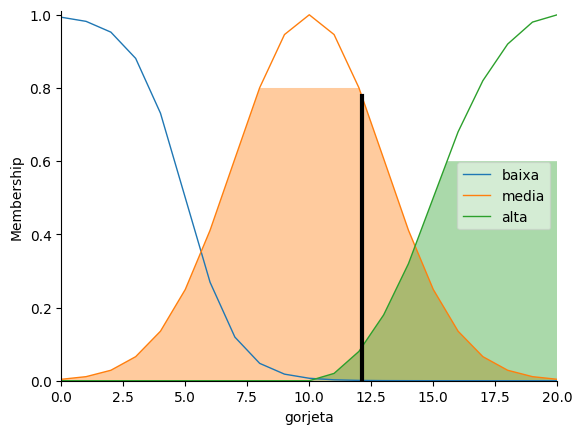

In [ ]:
# Imprime e visualiza gorjeta de acordo com valores de avaliação
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)